In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
globaltemps_data=pd.read_csv('GlobalLandTemperaturesByMajorCity.csv',parse_dates=["dt"], index_col="dt")
globaltemps_data.head()

,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
dt,,,,,,
1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [8]:
globaltemps_data.tail()

,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
dt,,,,,,
2013-05-01,18.979,0.807,Xian,China,34.56N,108.97E
2013-06-01,23.522,0.647,Xian,China,34.56N,108.97E
2013-07-01,25.251,1.042,Xian,China,34.56N,108.97E
2013-08-01,24.528,0.840,Xian,China,34.56N,108.97E
2013-09-01,NaN,NaN,Xian,China,34.56N,108.97E


In [9]:
globaltemps_data.describe()


,AverageTemperature,AverageTemperatureUncertainty
count,228175.000000,228175.000000
mean,18.125969,0.969343
std,10.024800,0.979644
min,-26.772000,0.040000
25%,12.710000,0.340000
50%,20.428000,0.592000
75%,25.918000,1.320000
max,38.283000,14.037000


In [10]:
globaltemps_data.shape, globaltemps_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 239177 entries, 1849-01-01 to 2013-09-01
Data columns (total 6 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   AverageTemperature             228175 non-null  float64
 1   AverageTemperatureUncertainty  228175 non-null  float64
 2   City                           239177 non-null  object 
 3   Country                        239177 non-null  object 
 4   Latitude                       239177 non-null  object 
 5   Longitude                      239177 non-null  object 
dtypes: float64(2), object(4)
memory usage: 12.8+ MB


((239177, 6), None)

In [11]:
globaltemps_data.index 

DatetimeIndex(['1849-01-01', '1849-02-01', '1849-03-01', '1849-04-01',
               '1849-05-01', '1849-06-01', '1849-07-01', '1849-08-01',
               '1849-09-01', '1849-10-01',
               ...
               '2012-12-01', '2013-01-01', '2013-02-01', '2013-03-01',
               '2013-04-01', '2013-05-01', '2013-06-01', '2013-07-01',
               '2013-08-01', '2013-09-01'],
              dtype='datetime64[ns]', name='dt', length=239177, freq=None)

TypeError: no numeric data to plot

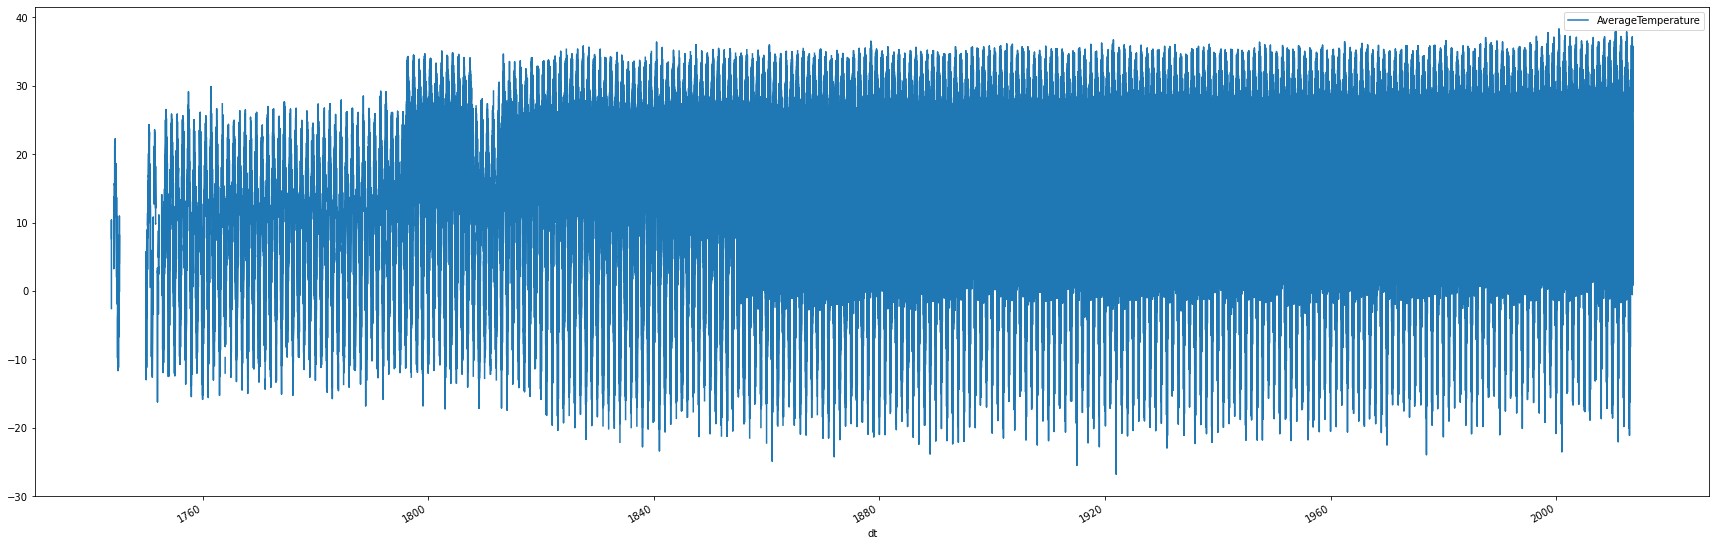

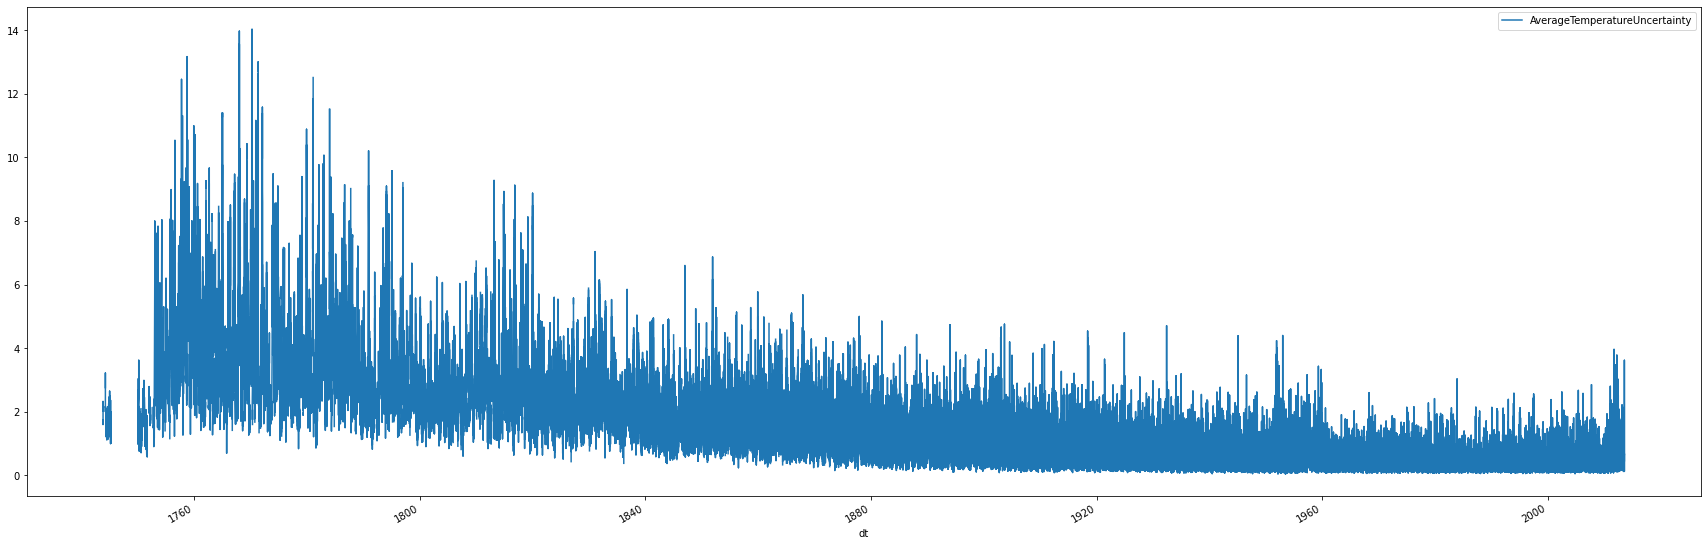

In [12]:
for itr in globaltemps_data.columns:
    globaltemps_data.plot(y=[itr], figsize=[30,10])

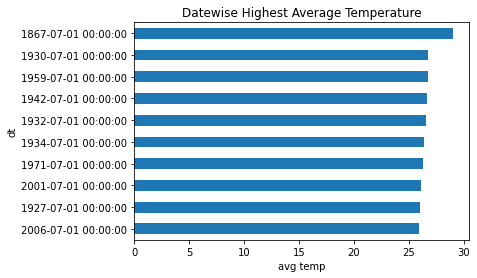

In [13]:
ax = globaltemps_data.groupby(['dt'])['AverageTemperature'].last().sort_values(ascending=False).head(10).sort_values().plot(kind='barh');
ax.set_xlabel("Average Temperature");
plt.title("Datewise Highest Average Temperature");

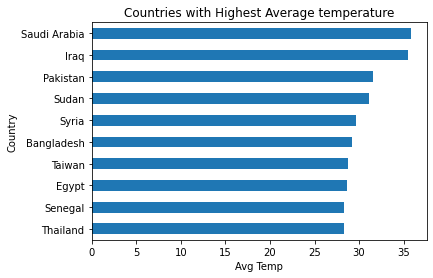

In [14]:
ax = globaltemps_data.groupby(['Country'])['AverageTemperature'].last().sort_values(ascending=False).head(10).sort_values().plot(kind='barh');
ax.set_xlabel("Avg Temp");
plt.title("Countries with Highest Average temperature");

In [21]:
india = globaltemps_data[globaltemps_data['Country']=='India']

new_india = india.groupby('year')['AverageTemperature'].mean().reset_index()
new_india.iplot(kind='scatter', x='year', y='AverageTemperature', title='Temperature trend in India',
               xTitle='Year', yTitle='Temperature')

KeyError: 'year'